In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id, the gender, the age and the estimated salary. A car company has just launched their brand new luxury SUV and we're trying to see which of these users of the social network are going to buy this brand 
new SUV. The last column here tells if (yes or no) the user bought this SUV. 

We are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables, the age and the estimated salary. So our matrix of feature is only going to be these two columns. 

We want to find some correlations between the age and the estimated salary of a user and his decision to purchase (yes or no) the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                0
EstimatedSalary    0
Gender             0
Purchased          0
User ID            0
dtype: int64

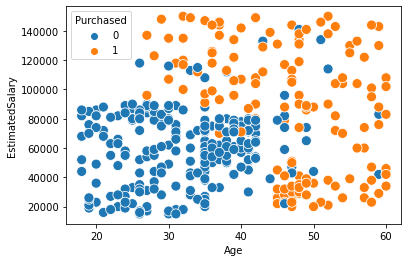

In [7]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",s=100)
plt.show()

- Scatter plot shows there exists a linear decision boundary
- Users aged 40 and above have a higher tendency to purchase a SUV car
- Also users earning an estimated salary greater than 90000 prefer to purchase a SUV car

<AxesSubplot:>

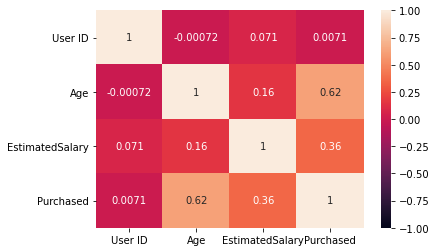

In [8]:
sns.heatmap(df.corr(),annot = True,vmin=-1)

- Age has a very good correlation of 0.62 with Purchased. Therefore it is an important feature

**Splitting the dataset into the Training set and Test set**

In [9]:
X = df[["Age","EstimatedSalary"]].values
y = df["Purchased"].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [10]:
X_train.shape,X_test.shape


((280, 2), (120, 2))

**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled,y_train)

LogisticRegression()

**Step 3 | Prediction**

In [13]:
y_pred = logistic_regression.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [14]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
115,0,0
116,1,0
117,0,0
118,1,1


**Step 4 | Evaluating The Prediction**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[69,  1],
       [18, 32]], dtype=int64)

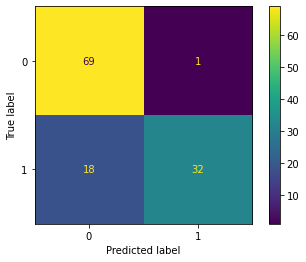

In [16]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

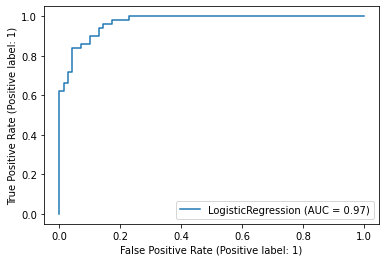

In [17]:
# ROC Curve
plot_roc_curve(logistic_regression,X_test_scaled,y_test)

- AUC score is 0.97 . Generally AUC score 1 represents a perfect classifier and 0.5 represents a worthless classifier

**Visualization**

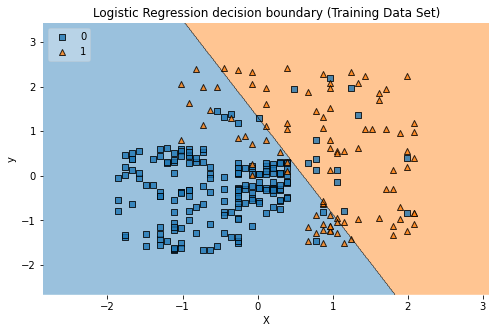

In [18]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8, 5))
fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=logistic_regression, legend=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression decision boundary (Training Data Set)')
plt.show()

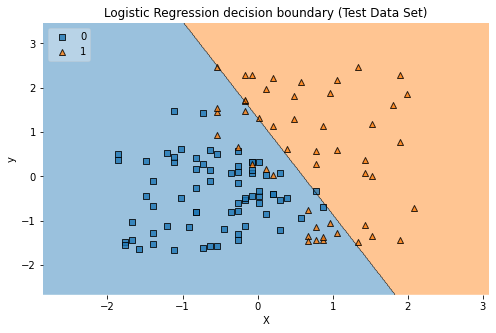

In [19]:
fig = plt.figure(figsize=(8, 5))
fig = plot_decision_regions(X=X_test_scaled, y=y_test, clf=logistic_regression, legend=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression decision boundary (Test Data Set)')
plt.show()